# Routing stack test valhalla: rich VRPs

* Date: 2023-01-08
* Issue: <https://github.com/WasteLabs/streamlit_example_routing_app/issues/4>

## Scope

Test the following routing stack:

* <https://github.com/gis-ops/docker-valhalla>: for generating the tile file
* <https://github.com/gis-ops/pyvalhalla>: to interact with it
* <https://github.com/VROOM-Project/pyvroom>: for routing optimisation


Here we test much richer VRPs.

## Pre-setup

Run the following to setup Valhalla with the example data:

```bash
docker run -dt --name valhalla_gis-ops -p 8002:8002 -v $PWD/custom_files:/custom_files -e tile_urls=https://download.bbbike.org/osm/bbbike/Montreal/Montreal.osm.pbf gisops/valhalla:latest
```

Then cope to the generated tile file to a convenient project location such as `data/primary`. You can also rename it here.

## Imports and jupyter setup

In [1]:
%load_ext kedro.extras.extensions.ipython
%reload_kedro

catalog = context.catalog
params = context.params
credentials = context._get_config_credentials()

[01/08/23 17:02:07] WARNING  /Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv ]8;id=472271;file:///Users/ejwillemse/.pyenv/versions/3.10.8/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=101606;file:///Users/ejwillemse/.pyenv/versions/3.10.8/lib/python3.10/warnings.py#109\109]8;;\
                             /lib/python3.10/site-packages/kedro/extras/extensions/ipython.py:18:                  
                             DeprecationWarning: kedro.extras.extensions.ipython should be accessed                
                             only using the alias kedro.ipython. The unaliased name will be removed                
                             in Kedro 0.19.0.                                                                      
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Resolved project path as:                                              ]8;id=47313;file:///Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=612543;file:///Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#132\132]8;;\
                             /Users/ejwillemse/dev/dev_research/streamlit_example_routing_app.                     
                             To set a different path, run '%reload_kedro <project_root>'                           

[01/08/23 17:02:07] WARNING  /Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv ]8;id=912262;file:///Users/ejwillemse/.pyenv/versions/3.10.8/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=809817;file:///Users/ejwillemse/.pyenv/versions/3.10.8/lib/python3.10/warnings.py#109\109]8;;\
                             /lib/python3.10/site-packages/kedro/framework/context/context.py:339:                 
                             UserWarning: Credentials not found in your Kedro project config.                      
                             No files found in                                                                     
                             ['/Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/con                
                             f/base',                                                                              
                             '/Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/conf                
                             /local'] matching the glob pattern(s): ['credentials*',                               
                             'credentials*/**', '**/credentials*']                                                 
                               warn(f"Credentials not found in your Kedro project                                  
                             config.\n{str(exc)}")                                                                 
                                                                                                                   

[01/08/23 17:02:09] INFO     Kedro project streamlit_example_routing_app                            ]8;id=900351;file:///Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=242632;file:///Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#101\101]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=896439;file:///Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=607955;file:///Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#102\102]8;;\
                             'pipelines'                                                                           

                    INFO     Resolved project path as:                                              ]8;id=796030;file:///Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=82809;file:///Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#132\132]8;;\
                             /Users/ejwillemse/dev/dev_research/streamlit_example_routing_app.                     
                             To set a different path, run '%reload_kedro <project_root>'                           

[01/08/23 17:02:09] WARNING  /Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv ]8;id=171715;file:///Users/ejwillemse/.pyenv/versions/3.10.8/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=853541;file:///Users/ejwillemse/.pyenv/versions/3.10.8/lib/python3.10/warnings.py#109\109]8;;\
                             /lib/python3.10/site-packages/kedro/framework/context/context.py:339:                 
                             UserWarning: Credentials not found in your Kedro project config.                      
                             No files found in                                                                     
                             ['/Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/con                
                             f/base',                                                                              
                             '/Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/conf                
                             /local'] matching the glob pattern(s): ['credentials*',                               
                             'credentials*/**', '**/credentials*']                                                 
                               warn(f"Credentials not found in your Kedro project                                  
                             config.\n{str(exc)}")                                                                 
                                                                                                                   

                    INFO     Kedro project streamlit_example_routing_app                            ]8;id=725275;file:///Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=844633;file:///Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#101\101]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=893679;file:///Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=507957;file:///Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#102\102]8;;\
                             'pipelines'                                                                           

In [76]:
# Imports / Configs / Global vars

# Import of native python tools
import os
import json
from functools import reduce

# Import of base ML stack libs
import numpy as np
import sklearn as sc

# Logging configuraiton
import logging
logging.basicConfig(format='[ %(asctime)s ][ %(levelname)s ]: %(message)s', datefmt='%m/%d/%Y %I:%M:%S %p')
logger = logging.getLogger()
logger.setLevel(logging.INFO)


# Ipython configs
from IPython.core.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
display(HTML("<style>.container { width:100% !important; }</style>"))
InteractiveShell.ast_node_interactivity = 'all'

# Pandas configs
import pandas as pd
pd.options.display.max_rows = 350
pd.options.display.max_columns = 250

# Jupyter configs
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

# GLOBAL VARS
from pathlib import Path
import sys
PROJECT_DIR = str(context.project_path) #os.getcwd().rsplit('/', 1)[0]

if PROJECT_DIR not in sys.path:
    sys.path.append(PROJECT_DIR)

os.chdir(PROJECT_DIR)

import plotly.express as px

from valhalla import Actor, get_config, get_help
from valhalla.utils import decode_polyline

import geopandas as gpd
from shapely.geometry import LineString, Polygon, Point
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import contextily as cx

import numpy as np

import vroom
from vroom.input import input

[01/08/23 17:37:12] WARNING  /var/folders/dy/_xqj_wpj3jl0lgk31f6ytns00000gp/T/ipykernel_83539/39619 ]8;id=583119;file:///Users/ejwillemse/.pyenv/versions/3.10.8/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=328961;file:///Users/ejwillemse/.pyenv/versions/3.10.8/lib/python3.10/warnings.py#109\109]8;;\
                             57502.py:20: DeprecationWarning: Importing display from                               
                             IPython.core.display is deprecated since IPython 7.14, please import                  
                             from IPython display                                                                  
                               from IPython.core.display import display, HTML                                      
                                                                                                                   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Test valhala and routingpy

Gt a local instance running at localhost <http://localhost:8002/>. See pre-setup.


### Get test data



In [97]:
def load_transform_data():
    """Load data and do some basic transformation. The `st.experimental_singleton`
    decorator prevents the data from being continously reloaded.
    """
    RENAME_COLUMNS = {
        "car_hours": "demand",
        "centroid_lat": "latitude",
        "centroid_lon": "longitude",
    }
    COLUMN_ORDER = [
        "route_id",
        "stop_id",
        "demand",
        "duration",
        "time_window_start",
        "time_window_end",
        "latitude",
        "longitude",
    ]
    data = px.data.carshare()
    time_window_start_h = np.random.randint(8, 14, data.shape[0])
    data = (
        data.assign(
            route_id=data["peak_hour"],
            duration=data.index,
            time_window_start=time_window_start_h,
            time_window_end=time_window_start_h + 4,
        )
        .sort_values(["route_id"])
        .assign(stop_id=np.arange(0, data.shape[0]))
        .rename(columns=RENAME_COLUMNS)
    )[COLUMN_ORDER]
    data = data.assign(
        time_window_start=data["time_window_start"].astype(str).str.zfill(2) + ":00",
        time_window_end=data["time_window_end"].astype(str).str.zfill(1) + ":00",
    )
    skill_mapping = {"bicycle": range(0, 50), "auto": range(50, data.shape[0])}
    for skill in skill_mapping:
        data.loc[data["stop_id"].isin(skill_mapping[skill]), "skill"] = skill
    return data


In [99]:
stop_data = load_transform_data()
stop_data.value_counts("skill")
( stop_data["time_window_start"] >= stop_data["time_window_end"] ).any()

skill
auto       199
bicycle     50
dtype: int64

False

## Setup valhalla

In [100]:
config = get_config(tile_extract='data/03_primary/valhalla_tiles_montreal.tar', verbose=False)

for profile in stop_data["skill"].unique():
    config["service_limits"][profile]["max_matrix_location_pairs"] = stop_data.shape[0] * stop_data.shape[0]  # change the default
    config["service_limits"][profile]["max_matrix_location_pairs"] = stop_data.shape[0] * stop_data.shape[0]  # change the default
    config["service_limits"][profile]["max_locations"] = stop_data.shape[0] + 1
    config["service_limits"][profile]["max_locations"] = stop_data.shape[0] + 1

actor = Actor(config)

## Get input matrix

In [101]:
lat_lon_points = stop_data.apply(
    lambda x: [x["longitude"], x["latitude"]], axis=1
).tolist()

profile_matrix = {}

for profile in stop_data["skill"].unique():
    logger.info(f"Creating time-distance profile {profile} with {stop_data.shape[0]} stops.")
    query = {"sources": [{"lat": y, "lon": x} for x,y in lat_lon_points], "targets": [{"lat": y, "lon": x} for x,y in lat_lon_points], "costing": profile, "metrics": ["distance", "duration"]}
    matrix = actor.matrix(query)

    time_matrix = np.full([stop_data.shape[0], stop_data.shape[0]], -1)
    distance_matrix = np.full([stop_data.shape[0], stop_data.shape[0]], -1)

    for sources in matrix["sources_to_targets"]:
        for destination in sources:
            distance_matrix[destination['from_index'], destination['to_index']] = destination["distance"]
            time_matrix[destination['from_index'], destination['to_index']] = destination["time"]
    profile_matrix[profile] = {"distance_matrix": distance_matrix, "time_matrix": time_matrix}

[01/08/23 17:54:06] INFO     Creating time-distance profile bicycle with 249 stops.                  ]8;id=636804;file:///var/folders/dy/_xqj_wpj3jl0lgk31f6ytns00000gp/T/ipykernel_83539/820943507.py\820943507.py]8;;\:]8;id=155551;file:///var/folders/dy/_xqj_wpj3jl0lgk31f6ytns00000gp/T/ipykernel_83539/820943507.py#8\8]8;;\

[01/08/23 17:55:32] INFO     Creating time-distance profile auto with 249 stops.                     ]8;id=617965;file:///var/folders/dy/_xqj_wpj3jl0lgk31f6ytns00000gp/T/ipykernel_83539/820943507.py\820943507.py]8;;\:]8;id=553883;file:///var/folders/dy/_xqj_wpj3jl0lgk31f6ytns00000gp/T/ipykernel_83539/820943507.py#8\8]8;;\

## Generate routing model

In [127]:
# convert time-windows

stop_data_route = stop_data.copy()
time_start = pd.to_datetime(stop_data_route["time_window_start"])
time_end = pd.to_datetime(stop_data_route["time_window_end"])

stop_data_route = stop_data_route.assign(
    time_window_start_seconds=(
        (time_start - time_start.dt.normalize()) / pd.Timedelta("1 second")
    ).astype(int),
    time_window_end_seconds=(
        (time_end - time_end.dt.normalize()) / pd.Timedelta("1 second")
    ).astype(int),
)
time_start = stop_data_route["time_window_start_seconds"].min()
stop_data_route = stop_data_route.assign(
    time_window_start_seconds=stop_data_route["time_window_start_seconds"]
    - time_start,
    time_window_end_seconds=stop_data_route["time_window_end_seconds"]
    - time_start,
)

# convert skills

skill_mapping = {"auto": np.nan, "bicycle": 1}
stop_data_route = stop_data_route.assign(skill_int = stop_data_route["skill"].replace(skill_mapping))

In [130]:
# populate model

problem_instance = input.Input()

# cost matrices

# vehicle
for i, profile in enumerate(stop_data["skill"].unique()):
    problem_instance.set_durations_matrix(profile=profile, matrix_input=time_matrix)
    if skill_mapping[profile] is not np.nan:
        skill = set([skill_mapping[profile]])
    else:
        skill = None
    problem_instance.add_vehicle(
        [
            vroom.vehicle.Vehicle(
                i, start=i, end=i, description=profile, profile=profile, skills=skill
            )
        ]
    )

# stops

for i, stop in stop_data_route.iloc[
    2:
].iterrows():  # add job info, first two are depots
    problem_instance.add_job(
        [
            vroom.job.Job(
                i,
                location=i,
                time_windows=[
                    vroom.time_window.TimeWindow(
                        stop["time_window_start_seconds"],
                        stop["time_window_end_seconds"],
                    ) # note that a stop can have multiple time-windows when it has a schedule, for example, between 09:00 and 10:00 or between 12:00 and 15:00
                ],
            )
        ]
    )

In [131]:
# solve
solution = problem_instance.solve(exploration_level=5, nb_threads=4)

## Inspect results

Some good stuff here:

 * https://blog.verso-optim.com/category/route-optimization/api/

In [134]:
solution.summary.cost
solution.unassigned
solution.routes

37717

[]

,vehicle_id,type,arrival,duration,setup,service,waiting_time,location_index,id,description
0,0,start,10807,0,0,0,0,0,<NA>,
1,0,job,10948,141,0,0,0,101,101,
2,0,job,11193,386,0,0,0,89,89,
3,0,job,11943,1136,0,0,0,210,210,
4,0,job,12767,1960,0,0,0,209,209,
5,0,job,12959,2152,0,0,0,128,128,
6,0,job,13126,2319,0,0,0,92,92,
7,0,job,13264,2457,0,0,0,95,95,
8,0,job,13416,2609,0,0,0,15,15,
9,0,job,13641,2834,0,0,0,44,44,


## Get paths from valhalla

In [237]:
def get_route(stop_data, config):
    actor = Actor(config)
    test_route = stop_data.apply(lambda x: [x["longitude"], x["latitude"]], axis=1).tolist()
    query = {"locations": [{"lat": y, "lon": x} for x,y in test_route], "costing": "auto"}
    route = actor.route(query)

    data = []
    geoms = []

    for leg in route["trip"]["legs"]:
        geom = decode_polyline(leg["shape"])
        duration = leg["summary"]["time"]
        distance = leg["summary"]["length"]
        data.append({"duration": duration / 60, "distance": distance, "index": 0})
        geoms.append(LineString(geom))

    routes = gpd.GeoDataFrame(data=data, geometry=geoms, crs="EPSG:4326").set_index("index")
    return routes

In [238]:
config = get_config(tile_extract='data/03_primary/valhalla_tiles_montreal.tar', verbose=False)
config["service_limits"]["auto"]["max_locations"] = solution.routes.shape[0]


2023/01/08 16:40:04.957851 [INFO] Tile extract successfully loaded with tile count: 14
2023/01/08 16:40:04.958278 [WARN] (stat): /data/valhalla/traffic.tar No such file or directory
2023/01/08 16:40:04.958290 [WARN] Traffic tile extract could not be loaded
2023/01/08 16:40:05.147442 [INFO] algorithm::bidirectional_a*
2023/01/08 16:40:05.149261 [INFO] algorithm::bidirectional_a*
2023/01/08 16:40:05.151381 [INFO] algorithm::bidirectional_a*
2023/01/08 16:40:05.153548 [INFO] algorithm::bidirectional_a*
2023/01/08 16:40:05.154822 [INFO] algorithm::bidirectional_a*
2023/01/08 16:40:05.158943 [INFO] algorithm::bidirectional_a*
2023/01/08 16:40:05.161821 [INFO] algorithm::bidirectional_a*
2023/01/08 16:40:05.164892 [INFO] algorithm::bidirectional_a*
2023/01/08 16:40:05.166926 [INFO] algorithm::bidirectional_a*
2023/01/08 16:40:05.170638 [INFO] algorithm::bidirectional_a*
2023/01/08 16:40:05.172927 [INFO] algorithm::bidirectional_a*
2023/01/08 16:40:05.173942 [INFO] algorithm::bidirectional_a*

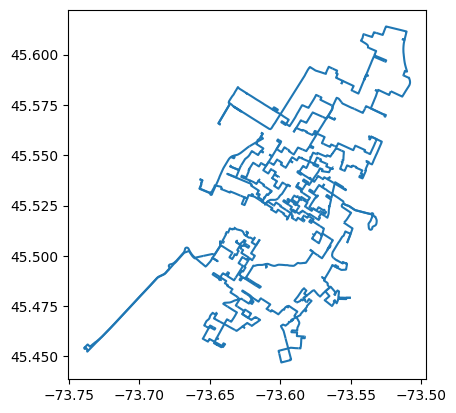

In [239]:
routes_full = solution.routes.merge(stop_data, how="left", left_on="location_index", right_on="stop_id")
full_routes = []
for vehicle in routes_full["vehicle_id"].unique():
    vehicle_df = routes_full.query(f"vehicle_id == {vehicle}")
    full_routes.append( get_route(vehicle_df, config) )
full_routes = pd.concat(full_routes)
full_routes.plot()

In [240]:
full_routes

,duration,distance,geometry
index,,,
0,2.162183,1.098,"LINESTRING (-73.61765 45.48542, -73.61720 45.4..."
0,2.153350,0.893,"LINESTRING (-73.62171 45.48811, -73.62409 45.4..."
0,1.750817,0.762,"LINESTRING (-73.62800 45.48904, -73.62742 45.4..."
0,0.875567,0.370,"LINESTRING (-73.62523 45.49347, -73.62501 45.4..."
0,1.305133,0.601,"LINESTRING (-73.62406 45.49605, -73.62378 45.4..."
0,2.520583,1.375,"LINESTRING (-73.61940 45.49836, -73.61917 45.4..."
0,2.109517,1.020,"LINESTRING (-73.61445 45.50815, -73.61449 45.5..."
0,2.286917,0.967,"LINESTRING (-73.61866 45.50918, -73.61856 45.5..."
0,2.352033,1.203,"LINESTRING (-73.62444 45.51205, -73.62431 45.5..."
